In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Country-data.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### checking null values

In [7]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### cheching Outliers

<AxesSubplot:>

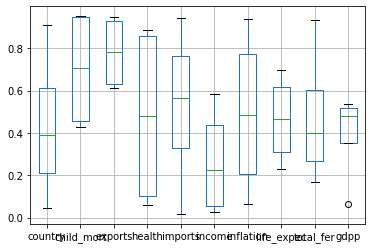

In [8]:
data1 = pd.DataFrame(data = np.random.random(size=(4,10)), columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
data1.boxplot()

In [9]:
X=data.iloc[:,1:10]

In [10]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
#normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

# KMeans Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5.56547363590342
1.6396610012586132
0.8446384593352135
0.6119593552562793
0.49325571957342546
0.37657405009860473
0.3067207644234218
0.2598073591174682
0.22777934259324284
0.1921210153994717


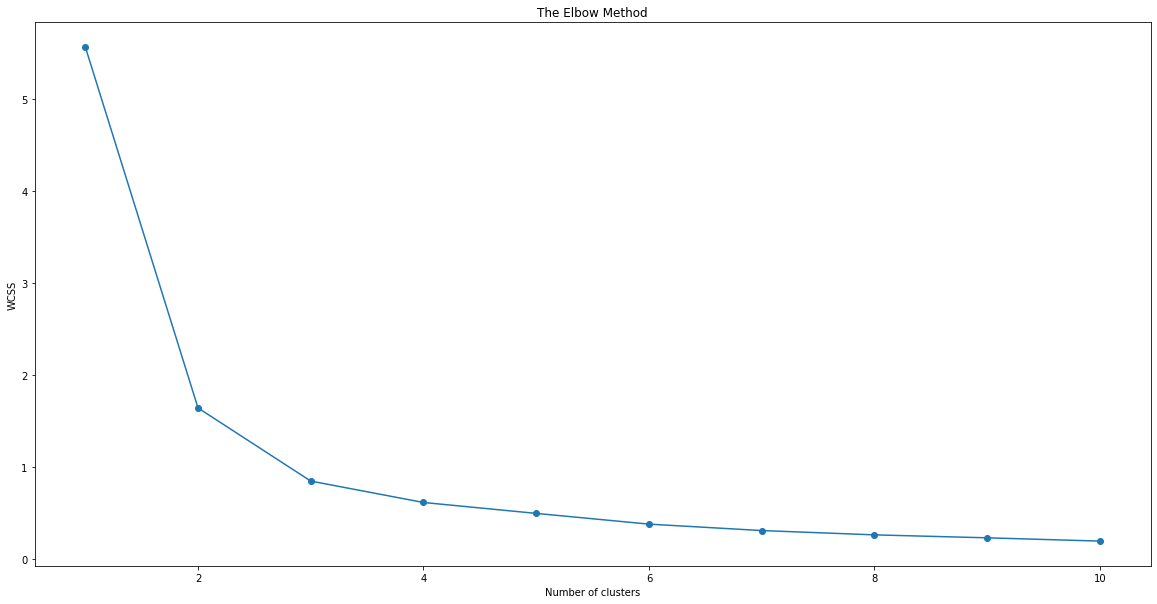

In [14]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#K means
kmeans = KMeans(n_clusters = 3,init= 'k-means++',random_state=42)
clusters_kmean= kmeans.fit_predict(X_norm)
type(X_norm)
clusters_kmean

array([1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1])

In [16]:
data["cluster1"]=kmeans.fit_predict(X_norm)

In [17]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [18]:
cluster_mean1=data.groupby(['cluster1']).mean()
cluster_mean1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster1,,,,,,,,,
0,10.545455,42.875758,9.866667,45.257576,34696.060606,3.503455,78.403030,2.103333,38552.121212
1,55.420732,33.628037,6.010732,43.103243,8538.829268,10.554524,66.456098,3.466585,3494.060976
2,28.819231,51.784615,6.148846,53.898077,19577.096154,6.124635,72.040385,2.666154,11659.250000


In [19]:
data['cluster1'].value_counts()

1    82
2    52
0    33
Name: cluster1, dtype: int64

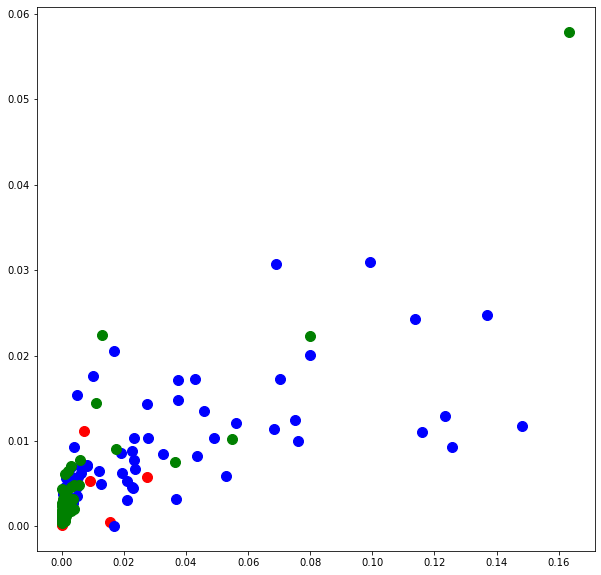

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_kmean==0,0],X_norm[clusters_kmean==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_kmean==1,0],X_norm[clusters_kmean==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_kmean==2,0],X_norm[clusters_kmean==2,1],s=100,c='green',label='cluster 3')

from this we understand the cluster number 1 has very low income countries

# HC Clustering

In [21]:
import scipy.cluster.hierarchy as sch

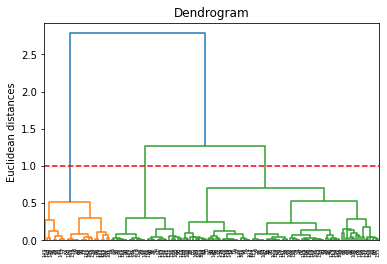

In [22]:
dendrogram=sch.dendrogram(sch.linkage(X_norm,method="ward"))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.hlines(1,0,5000,colors ="r",linestyles = "dashed")


optimum number of clusters is 3

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
clusters_hc=hc.fit_predict(X_norm)
clusters_hc

array([0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0], dtype=int64)

In [25]:
data["cluster2"]=hc.fit_predict(X_norm)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2


In [26]:
cluster_mean2=data.groupby(['cluster2']).mean()
cluster_mean2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1
cluster2,,,,,,,,,,
0,54.597959,36.503051,5.887755,44.711897,9760.642857,10.208990,66.818367,3.469490,4258.306122,1.163265
1,10.545455,42.875758,9.866667,45.257576,34696.060606,3.503455,78.403030,2.103333,38552.121212,0.000000
2,19.236111,52.027778,6.545000,54.316667,21156.944444,5.096417,73.536111,2.302500,13207.777778,2.000000


In [27]:
data['cluster2'].value_counts()

0    98
2    36
1    33
Name: cluster2, dtype: int64

from this we understand than cluster number o has very low income countries(number=98)

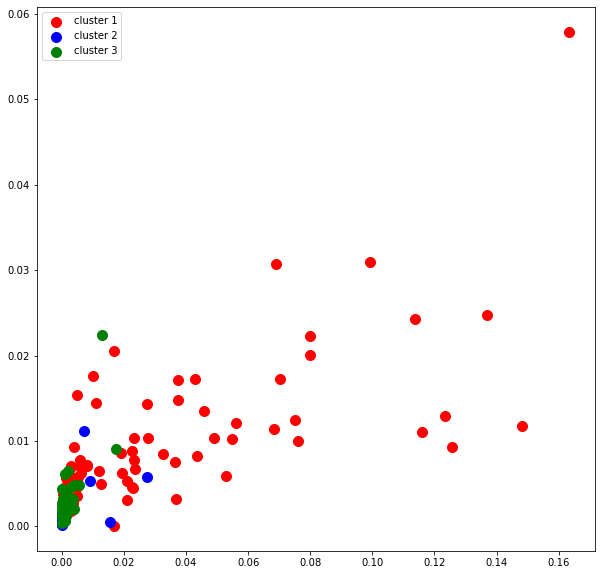

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_hc==0,0],X_norm[clusters_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_hc==1,0],X_norm[clusters_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_hc==2,0],X_norm[clusters_hc==2,1],s=100,c='green',label='cluster 3')
plt.legend()
plt.show()

# PCA

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()
scaled_data=sc.fit_transform(X)
scaled_data=pd.DataFrame(scaled_data,columns=X.columns)
scaled_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,3.988825e-18,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [31]:
from sklearn.decomposition import PCA

In [32]:
pca=PCA(0.80)

In [33]:
x_pca=pca.fit_transform(scaled_data)
x_pca.shape

(167, 4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PC2')

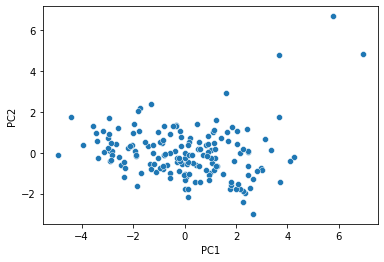

In [34]:
sns.scatterplot(x_pca[:,0],x_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

###### KMeans clusttering after PCA

In [35]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1310.4775156877945
859.0954098354578
643.3530304947254
514.2073501405229
446.4590617016485
396.65567435922196
361.70294371634617
318.58107661461946
291.6291114419494
269.6523228705579


Text(0.5, 1.0, 'The Elbow Method')

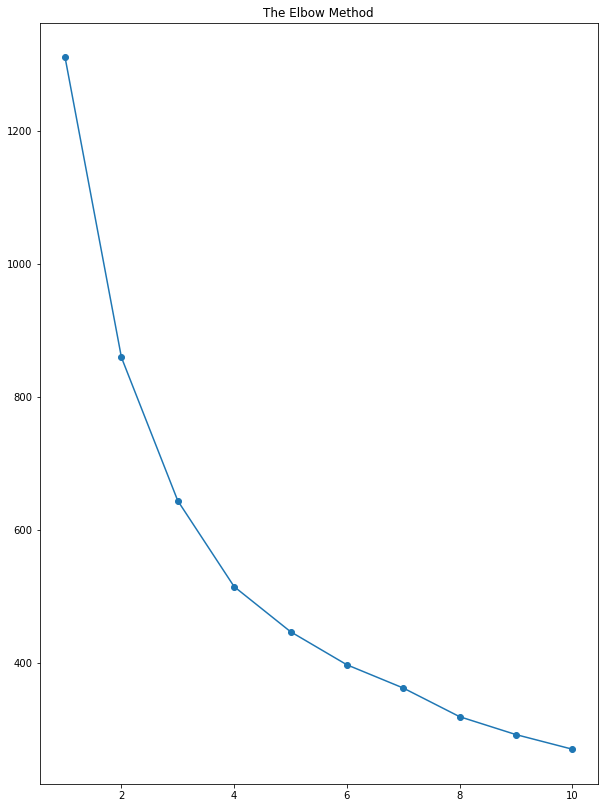

In [36]:
plt.figure(figsize=(10,14))
plt.plot(range(1,11),wcss,'-o')
plt.title("The Elbow Method")

In [37]:
# the optimal number of clusters is 5

In [38]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(x_pca)
data['cluster3']=model_kmeans.predict(x_pca)
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,0,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,2,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,2,3
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,0,3
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,1,4
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,1,4
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,0,3


In [39]:
cluster_mean3=data.groupby(['cluster3']).mean()
cluster_mean3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2
cluster3,,,,,,,,,,,
0,16.622222,50.303704,6.940185,59.987037,14057.777778,3.742741,73.448148,2.103519,8450.481481,1.370370,0.851852
1,94.857778,28.289111,6.407778,43.026667,3493.177778,11.816111,58.926667,5.038667,1713.377778,1.155556,0.177778
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1.333333,1.666667
3,28.284211,29.918132,5.315000,30.517524,12901.315789,12.638053,72.336842,2.584211,6189.105263,1.289474,0.500000
4,5.100000,44.848148,9.361111,37.981481,46833.333333,2.891963,80.437037,1.838519,45322.222222,0.259259,1.000000


In [40]:
data['cluster3'].value_counts()

0    54
1    45
3    38
4    27
2     3
Name: cluster3, dtype: int64

from this we understand that the cluster group 1 has high child_mortality rate ,low income so this cluster group are thec ountries that are in the direst need of aid

In [43]:
data.loc[data['cluster3']==1]['country'].to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

### HC model after pca

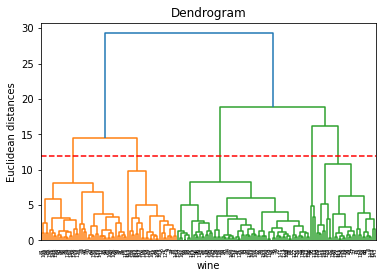

In [44]:
dendrogram=sch.dendrogram(sch.linkage(x_pca,method="ward"))
plt.title("Dendrogram")
plt.xlabel("wine")
plt.ylabel("Euclidean distances")
plt.hlines(12,0,5000,colors ="r",linestyles = "dashed")

from this the optimum number of cluster is 5

In [45]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
clusters_hc=hc.fit_predict(x_pca)
clusters_hc

array([4, 2, 1, 4, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 4, 2, 1, 2, 4,
       2, 0, 2, 4, 4, 2, 4, 0, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2,
       0, 2, 2, 1, 2, 4, 1, 2, 2, 0, 0, 1, 4, 2, 0, 4, 0, 2, 2, 4, 4, 2,
       4, 2, 0, 1, 1, 1, 4, 0, 2, 0, 2, 0, 2, 1, 4, 4, 0, 2, 4, 2, 2, 4,
       4, 0, 2, 3, 2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 2, 1, 2, 2, 4, 1, 4, 1,
       0, 0, 4, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 4, 2, 0, 4, 2, 2,
       4, 3, 2, 2, 4, 4, 2, 0, 1, 2, 1, 2, 0, 0, 4, 4, 2, 1, 4, 2, 2, 2,
       2, 4, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 4], dtype=int64)

In [46]:
data["cluster4"]=hc.fit_predict(x_pca)
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3,cluster4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,0,1,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,0,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,0,3,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,2,1,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,2,0,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,2,3,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,0,3,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,1,4,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,1,4,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,0,3,1


In [47]:
data.groupby(data["cluster4"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3
cluster4,,,,,,,,,,,,
0,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42150.000000,0.400000,0.866667,3.766667
1,44.784000,26.359160,4.671200,25.270636,8920.800000,20.570400,69.052000,3.156000,3989.600000,1.000000,0.240000,2.520000
2,16.974242,44.656061,6.743788,53.295455,13563.181818,4.119909,74.171212,2.118182,8361.000000,1.424242,0.878788,0.696970
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1.333333,1.666667,2.000000
4,91.932558,30.340000,6.859070,47.711628,3641.232558,8.726395,58.679070,4.940233,1773.209302,1.186047,0.232558,1.046512


In [48]:
data['cluster4'].value_counts()

2    66
4    43
0    30
1    25
3     3
Name: cluster4, dtype: int64

from this we understand that the cluster group 4 has high child_mortality rate ,low income so this cluster group are thec ountries that are in the direst need of aid

In [50]:
data.loc[data['cluster4']==4]['country'].to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mozambique',
 'Namibia',
 'Niger',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Tajikistan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Zambia']